# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. Нужно научиться определять рыночную стоимость объектов недвижимости.

Наша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта, ближайшего парка и водоёма.

# Цели и задачи проекта   

**Цели:**

Провести исследование с целью выявить интересные особенности и зависимости, которые существуют на рынке недвижимости.

Результаты исследования будут учтены при построении модели зависимости стоимости объектов от различных параметров на рынке недвижимости. 

**Задачи:**

**Шаг 1. Откроем файл с данными и изучим общую информацию**
1. Загрузим данные из файла в датафрейм.
2. Изучим общую информацию о полученном датафрейме.
3. Построим общую гистограмму для всех числовых столбцов таблицы. Например, для датафрейма `data` это можно сделать командой `data.hist(figsize=(15, 20))`.

**Шаг 2. Предобработка данных**
1. Найдём и изучим пропущенные значения в столбцах:
   - Определим, в каких столбцах есть пропуски.
   - Заполним пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставим эти значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
   - В ячейке с типом `markdown` укажем причины, которые могли привести к пропускам в данных.
2. Рассмотрим типы данных в каждом столбце:
   - Найдём столбцы, в которых нужно изменить тип данных.
   - Преобразуем тип данных в выбранных столбцах.
   - В ячейке с типом `markdown` поясним, почему нужно изменить тип данных.
3. Изучим уникальные значения в столбце с названиями и устраним неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Мы можем заменить названия в существующем столбце или создать новый с названиями без дубликатов.
4. Найдём и устраним редкие и выбивающиеся значения. Например, в столбце `ceiling_height` может быть указана высота потолков `25 м` и `32 м`. Логично предположить, что на самом деле это вещественные значения: `2.5 м` и `3.2 м`. Попробуем обработать аномалии в этом и других столбцах.
   - Если природа аномалии понятна и данные действительно искажены, то восстановим корректное значение.
   - В противном случае удалим редкие и выбивающиеся значения.
   - В ячейке с типом `markdown` опишем, какие особенности в данных мы обнаружили.

**Шаг 3. Добавим в таблицу новые столбцы со следующими параметрами:**
   - цена одного квадратного метра;
   - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры (значения — «‎первый», «последний», «другой»);
   - расстояние до центра города в километрах (переведите из *м* в *км* и округлите до целых значений).

**Шаг 4. Проведём исследовательский анализ данных:**
1. Изучим следующие параметры объектов:
   - общая площадь;
   - жилая площадь;
   - площадь кухни;
   - цена объекта;
   - количество комнат;
   - высота потолков;
   - этаж квартиры;
   - тип этажа квартиры («первый», «последний», «другой»);
   - общее количество этажей в доме;
   - расстояние до центра города в метрах;
   - расстояние до ближайшего аэропорта;
   - расстояние до ближайшего парка;
   - день и месяц публикации объявления.

Построим отдельные гистограммы для каждого из этих параметров. Опишем все ваши наблюдения по параметрам в ячейке с типом `markdown`.

2. Изучим, как быстро продавались квартиры (столбец `days_exposition`). Этот параметр показывает, сколько дней было размещено каждое объявление.
   - Построим гистограмму.
   - Посчитаем среднее и медиану.
   - В ячейке типа `markdown` опишем, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?

3. Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучим, зависит ли цена от:
   - общей площади;
   - жилой площади;
   - площади кухни;
   - количества комнат;
   - этажа, на котором расположена квартира (первый, последний, другой);
   - даты размещения (день недели, месяц, год).
   
Построим графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией мы можем использовать сводные таблицы.

4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`.
5. Ранее мы посчитали расстояние до центра в километрах. Теперь выделим квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислим среднюю цену каждого километра. Опишем, как стоимость объектов зависит от расстояния до центра города.

**Шаг 5. Напишем общий вывод**

Опишем полученные результаты и зафиксируем основной вывод проведённого исследования.
    
В ходе проведения исследования нам необходимо проверить несколько гипотез:

- Гипотеза 1: общая площадь влияет на общую (полную) стоимость объекта;
- Гипотеза 2: жилая площадь влияет на общую (полную) стоимость объекта;
- Гипотеза 3: площадь кухни влияет на общую (полную) стоимость объекта;
- Гипотеза 4: количество комнат влияет на общую (полную) стоимость объекта;
- Гипотеза 5: этаж, на котором расположена квартира, влияет на общую (полную) стоимость объекта;
- Гипотеза 6: дата размещения объявления влияет на общую (полную) стоимость объекта; 
- Гипотеза 7: расстояния до центра Санкт-Петербурга влияет на общую (полную) стоимость объекта.   

# Описание данных

Входные данные – архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах от сервиса Яндекс Недвижимость. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.

Путь к файлу: `/datasets/real_estate_data.csv`

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

# План работы

1. Откроем файл с данными и изучим общую информацию
2. Предобработка данных
3. Посчитаем и добавим в таблицу новые столбцы
4. Проведём исследовательский анализ данных
5. Общий вывод

### Откроем файл с данными и изучим общую информацию. 

In [1]:
import pandas as pd

In [2]:
# 1. Загружаем данные из файла в датафрейм.

data = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Мои проекты/'
                       'GitHubRepositories/YandexPracticum/'
                       '01_research_data_analysis_research_of_apartments/real_estate_data.csv', sep = '\t')

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
# 2. Изучаем общую информацию о полученном датафрейме.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Таблица содержит 23699 строки, 22 колонки.

Типы данных:
        
`dtypes: bool(2), float64(14), int64(3), object(3)`
        
Исходя из данных `Non-Null Count`, видно, что во многих столбцах присутствуют пропуски.

In [4]:
# Выведем числовое описание данных, применив метод describe().

display(data.describe())

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


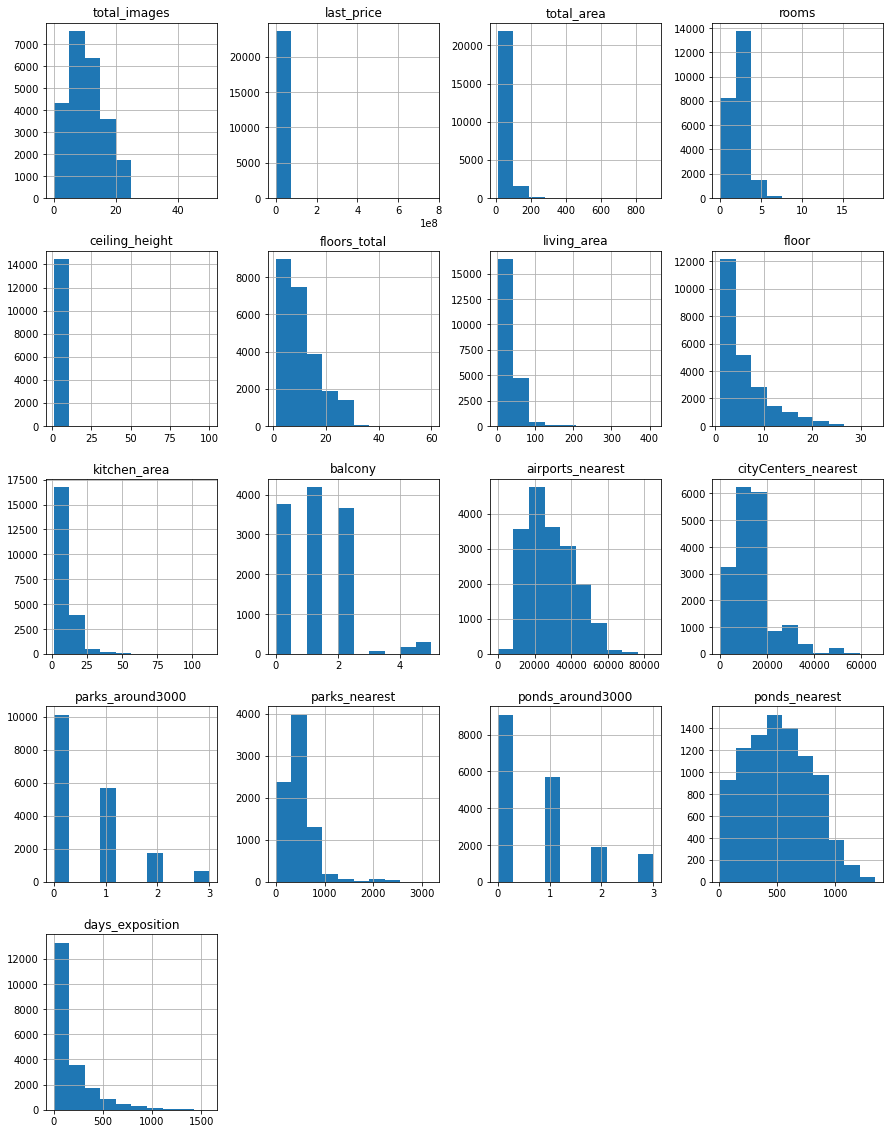

In [5]:
# 3. Построим общую гистограмму для всех столбцов таблицы.

import matplotlib.pyplot as plt
data.hist(figsize=(15, 20))
plt.show()

In [6]:
# Проверим явные дубликаты в датафрейме:

data.duplicated().sum()

0

Итак, явных дубликатов в датафрейме нет.
    
Но присутствуют аномальные значения. К явно аномальным значениям можно отнести высоту потолков от 1 м до 100 м, жилую площадь  от 2 м², площадь кухни от 1,3 м².
    
Есть ещё некоторое несовпадение в данных по этажам. Максимальное количесвто этажей в доме - 60, при этом максимальный этаж квартиры - 33. Но это нельзя считать аномалией, т.к. 60-ти этажные дома, действительно, имеют место быть. Но таких домов, а значит и объявлений, мало, поэтому наблюдается несовпадение по этажам.

### Предобработка данных

In [7]:
# Найдём и изучим пропущенные значения в столбцах:
# определим, в каких столбцах еисть пропуски.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# Заполним пропущенные значения там, где это возможно.
# Например, если продавец не указал число балконов, то, скорее всего, в его квартире их нет. 
# Такие пропуски правильно заменить на 0. 
# Если логичную замену предложить невозможно, то оставим эти значения пустыми. 
# Пропуски — тоже важный сигнал, который нужно учитывать.

for column in ['balcony', 'parks_around3000', 'ponds_around3000']:
    data[column] = data[column].fillna(0)

В некоторых столбцах таблицы так много пропусков, что использование данных из этих столбцов для проведения анализа весьма сомнительно. Тем не менее, в задании предполагается, что если, например, продавец не указал число балконов (столбец `'balcony'`), то, скорее всего, в его квартире их нет. И эти пропуски можно заменить на 0. То же самое можно сделать и для числа парков (столбец `'parks_around3000'`) и водоёмов (столбец `'ponds_around3000'`) в радиусе 3 км.
        
Для заполнения других пропущенных значений можно обратиться к [числовому описанию данных](#intro) и брать оттуда медианы значений. Но после удаления выбросов в данных, значения медиан с большой долей вероятности изменятся. Поэтому заполнять эти пропуски пока не будем.
        
Строки с пропусками в столбцах `'floors_total'` (всего этажей в доме) и `'locality_name'` (название населённого пункта) можно будет совсем удалить, т.к. их количество никак не влияет на общую выборку. 
        
Столбец `'is_apartment'` (апартаменты (булев тип)) - неинформативен, т.к. пропуски в нём содержатся в подавляющем количестве строк. Плюс к этому, данные `data` - это архив объявлений о продаже квартир, что и предполагает апартаменты.
        
**Причины, которые могли привести к пропускам в данных.**
        
Количество пропусков в столбцах `'airports_nearest'` (расстояние до ближайшего аэропорта в метрах (м)), `'cityCenters_nearest'` (расстояние до центра города (м)), `'parks_around3000'` и `'ponds_around3000'` практически совпадает, что может указывать на то, что пропуски появились в результате сбоя. К этой версии склоняет и то, что все эти данные относятся к картографическим, а не к добавленным пользователем. Если посмотреть на выгрузку первых десяти строк, также видно, что пропуски в строке дублируются в каждой из этих колонок. Если это сбой, то, возможно, необходимо удалить все строки с пропусками в этих столбцах.

In [9]:
# Убедимся, что в столбцах 'balcony', 'parks_around3000' и 'ponds_around3000' не осталось пропусков. 
# Для этого ещё раз посчитаем пропущенные значения.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [10]:
# Рассмотрим типы данных в каждом столбце:
# Найдём столбцы, в которых нужно изменить тип данных.
# Преобразуем тип данных в выбранных столбцах.

data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

data['days_exposition'] = data['days_exposition'].round()

for column in ['floors_total', 'balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']:
    data[column] = data[column].astype('Int64')

    
# Убедимся, что в столбцах 'first_day_exposition', floors_total', 'balcony', 'parks_around3000',
# 'ponds_around3000', 'days_exposition' изменился тип данных. 
# Для этого ещё раз выведем общую информацию о датафрейме и первые 10 строк самого датафрейма.

data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,NaN,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,NaN,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


Тип данных необходимо изменить в столбцах `'floors_total'`, `'balcony'`, `'parks_around3000'`, `'ponds_around3000'` и `'days_exposition'` (сколько дней было размещено объявление (от публикации до снятия)), т.к. эти столбцы содержат данные, которые можно посчитать, используя целые числа.
        
Данные в столбце `'days_exposition'` пришлось сначал округлить при помощи метода `round()`, т.к. без округления появлялась ошибка
        
`'TypeError: cannot safely cast non-equivalent float64 to int64'`. 
        
Видимо, в этом столбце присутствовали дробные числа. Хотя при выводе первых и последних 30 строк этого не видно.

In [11]:
# Изучим уникальные значения в столбце с названиями населённых пунктов и устраним неявные дубликаты. 
# Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — 
# это обозначения одних и тех же населённых пунктов. 

# Отсортируем и выведем уникальные значения в столбце 'locality_name'.

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [12]:
# Заменим названия в столбце 'locality_name'. Для этого заменим 'ё' на 'е' и 'городской поселок' на 'поселок городского типа'. 

data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок городского типа')

# Отсортируем и выведем уникальные значения в столбце 'locality_name' повторно. Данные стали восприниматься лучше.

data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'деревня Агалатово', 'деревня Аро', 'деревня Батово',
       'деревня Бегуницы', 'деревня Белогорка', 'деревня Большая Вруда',
       'деревня Большая Пустомержа', 'деревня Большие Колпаны',
       'деревня Большое Рейзино', 'деревня Большой Сабск', 'деревня Бор',
       'деревня Борисова Грива', 'деревня Ваганово', 'деревня Вартемяги',
       'деревня Вахнова Кара', 'деревня Выскатка

In [13]:
# Выведем количество уникальных значений в столбце 'locality_name':

len(data['locality_name'].unique())

324

In [14]:
# Проверим, есть ли в столбце 'locality_name' дубликаты, возникающие из-за разницы в регистре букв.
# Для этого приведём все значения к нижнему регистру и сравним количество уникальных значений до и после изменений:

locality_name_lower = data['locality_name'].str.lower()
len(locality_name_lower.unique())

324

In [15]:
# Важной задачей является удаление пропусков там, где это возможно. 
# В столбце с названиями населённых пунктов 'locality_name' - 49 пропусков.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [16]:
# Т.к. без названия населённого пункта все остальные данные теряют смысл, удалим эти пропуски.

data = data.dropna(subset=['locality_name']).reset_index(drop=True)

data.isna().sum()

#  Из общей информации о датафрейме видно, что количество строк в data уменьшилось на 49 (с 23699 до 23650).
# Пропуски в столбце 'locality_name' удалены.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [17]:
# Найдём и устраним редкие и выбивающиеся значения. 
# Например, в столбце 'ceiling_height' может быть указана высота потолков 25 м и 32 м. 
# Логично предположить, что на самом деле это вещественные значения: 2,5 м и 3,2 м. 
# Обработаем аномалии в этом и других столбцах.

# Если природа аномалии понятна и данные действительно искажены, то восстановим корректное значение.
# В противном случае удалим редкие и выбивающиеся значения.

# Отсортируем и выведем уникальные значения в столбце 'ceiling_height'.

data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

In [18]:
# Найдём количество аномальных значений в столбце 'ceiling_height', равных и превышающих 10.

print(len(data.loc[data['ceiling_height'] >= 10.0]))

25


In [19]:
# Таких значений всего 25, значит на общую выборку эти ошибочные значения влияют мало. 
# Но их всё-равно можно скорректировать. 
# Предположим, что эти начения изначально были указаны без запятой, поэтому разделим их на 10 и сохраним в data.

data.loc[data['ceiling_height'] >= 10.0, 'ceiling_height'] = data['ceiling_height']/10

# Убедимся в том, что замена произошла. На этот раз выводить список уникальных значений не нужно.

display(data['ceiling_height'].describe())

count    14490.000000
mean         2.727846
std          0.299664
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

In [20]:
# В столбце 'ceiling_height' содержится очень много пропусков - 9160.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [21]:
# Удалим строки с пропусками и аномальными данными (меньше 2 м и больше 4 м)
# и посмотрим на то, как это скажется на величинах среднего и медианы. 
# Отфильтруем значения высоты потолков в диапазоне от 2 до 4 метров.

data_filter_ceiling_height = data.query('2.0 < ceiling_height <= 4.0')

display(data_filter_ceiling_height['ceiling_height'].describe())

count    14422.000000
mean         2.721177
std          0.257150
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

Мы видим, что фильтрация данных не привела к значимому изменению среднего и медианы, относительно [первоначальных данных](#intro). Поэтому фильтрацию можно не проводить (не использовать в дальнейшем переменную `data_filter_ceiling_height`). И это не корректно по причине того, что после фильтрации от первоначальных 23699 остаётся 14422 строки, т.е мы теряем огромную часть данных, заполненных в других столбцах.

In [22]:
# Заменим в data значения столбца 'ceiling_height', не вошедшие в диапазон от 2 до 4 м, на медиану 2,65 м.
# Убедимся, что медиана и среднее не изменили значений.

data.loc[data['ceiling_height'] <= 2.0, 'ceiling_height'] = data['ceiling_height'].median()
data.loc[data['ceiling_height'] > 4.0, 'ceiling_height'] = data['ceiling_height'].median()

display(data['ceiling_height'].describe())

count    14490.000000
mean         2.720843
std          0.256592
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.000000
Name: ceiling_height, dtype: float64

In [23]:
# Повторим аналогичные действия для столбцов 'total_area', 'living_area', 'kitchen_area', 
# 'last_price', 'rooms', 'days_exposition'.

# В столбце 'total_area' пропусков нет.

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [24]:
# Отсортируем и выведем уникальные значения в столбце 'total_area'.

data['total_area'].sort_values().unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

In [25]:
# Удалим строки с пропусками и аномальными данными (меньше 16 м² и больше 200 м²)
# и посмотрим на то, как это скажется на величинах среднего и медианы. 

data_filter_total_area = data.query('16.0 < total_area < 200.0')

display(data_filter_total_area['total_area'].describe())

count    23409.000000
mean        58.150130
std         26.445484
min         17.000000
25%         40.000000
50%         51.800000
75%         68.800000
max        199.200000
Name: total_area, dtype: float64

Мы видим, что фильтрация данных не привела к значимому изменению среднего и медианы, относительно [первоначальных данных](#intro). Поэтому фильтрацию можно не проводить (не использовать в дальнейшем переменную `data_filter_total_area`), не смотря на то, что после фильтрации от первоначальных 23699 осталось 23409 строки (т.е. данные, меньше 16 м² и больше 200 м², можно обозначить как выбросы).

In [26]:
# Заменим в data значения столбца 'total_area', меньше 16 м² и больше 200 м², на медиану 51,8 м².
# Убедимся, что медиана и среднее практически не изменили значений.

data.loc[data['total_area'] >= 200.0, 'total_area'] = data['total_area'].median()
data.loc[data['total_area'] < 16.0, 'total_area'] = data['total_area'].median()

display(data['total_area'].describe())

count    23650.000000
mean        58.085937
std         26.319032
min         16.000000
25%         40.000000
50%         52.000000
75%         68.300000
max        199.200000
Name: total_area, dtype: float64

In [27]:
# Для столбца 'living_area'.

# Отсортируем и выведем уникальные значения в столбце 'living_area'.

data['living_area'].sort_values().unique()

array([  2. ,   3. ,   5. , ..., 409. , 409.7,   nan])

In [28]:
# Удалим строки с пропусками и аномальными данными (меньше 16 м² и больше 160 м²)
# и посмотрим на то, как это скакжется на величинах среднего и медианы. 

data_filter_living_area = data.query('16 < living_area < 160.0')

display(data_filter_living_area['living_area'].describe())

count    19634.000000
mean        35.629271
std         18.393783
min         16.040000
25%         20.800000
50%         31.100000
75%         43.100000
max        159.900000
Name: living_area, dtype: float64

Мы видим, что фильтрация данных не привела к значимому изменению среднего и медианы, относительно [первоначальных данных](#intro). Поэтому фильтрацию можно не проводить (не использовать в дальнейшем переменную `data_filter_living_area`), не смотря на то, что после фильтрации от первоначальных 23699 осталось 19634 строки (т.е. данные, меньше 16 м² и больше 160 м², можно обозначить как выбросы).

In [29]:
# Заменим в data значения столбца 'living_area', меньше 16 м² и больше 160 м², на медиану 31,1 м².
# Убедимся, что медиана и среднее практически не изменили значений.

data.loc[data['living_area'] >= 160.0, 'living_area'] = data['living_area'].median()
data.loc[data['living_area'] < 16.0, 'living_area'] = data['living_area'].median()


display(data['living_area'].describe())

count    21752.000000
mean        34.768991
std         17.765608
min         16.000000
25%         21.000000
50%         30.000000
75%         42.000000
max        159.900000
Name: living_area, dtype: float64

In [30]:
# Для столбца 'kitchen_area'.

# Отсортируем и выведем уникальные значения в столбце 'kitchen_area'.

data['kitchen_area'].sort_values().unique()

array([  1.3 ,   2.  ,   2.3 ,   2.4 ,   2.89,   3.  ,   3.2 ,   3.3 ,
         3.4 ,   3.5 ,   3.7 ,   3.8 ,   4.  ,   4.1 ,   4.2 ,   4.3 ,
         4.4 ,   4.5 ,   4.6 ,   4.7 ,   4.8 ,   4.9 ,   5.  ,   5.04,
         5.06,   5.1 ,   5.14,   5.2 ,   5.21,   5.23,   5.25,   5.28,
         5.29,   5.3 ,   5.31,   5.33,   5.35,   5.4 ,   5.42,   5.44,
         5.47,   5.49,   5.5 ,   5.53,   5.59,   5.6 ,   5.61,   5.62,
         5.64,   5.65,   5.68,   5.7 ,   5.74,   5.75,   5.78,   5.8 ,
         5.82,   5.85,   5.86,   5.9 ,   5.91,   6.  ,   6.02,   6.03,
         6.1 ,   6.16,   6.19,   6.2 ,   6.22,   6.23,   6.24,   6.25,
         6.26,   6.27,   6.28,   6.3 ,   6.31,   6.33,   6.35,   6.36,
         6.37,   6.4 ,   6.47,   6.5 ,   6.55,   6.58,   6.6 ,   6.61,
         6.62,   6.65,   6.7 ,   6.72,   6.73,   6.76,   6.77,   6.8 ,
         6.82,   6.83,   6.84,   6.86,   6.9 ,   6.91,   6.93,   6.95,
         7.  ,   7.02,   7.03,   7.06,   7.09,   7.1 ,   7.12,   7.15,
      

In [31]:
# Удалим строки с пропусками и аномальными данными (больше 50 м²)
# и посмотрим на то, как это скакжется на величинах среднего и медианы. 
# Нижняя граница площади не установлена, т.к. в квартирах может не быть кухни.

data_filter_kitchen_area = data.query('kitchen_area < 50.0')

display(data_filter_kitchen_area['kitchen_area'].describe())

count    21323.000000
mean        10.424230
std          5.178905
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         49.400000
Name: kitchen_area, dtype: float64

Мы видим, что фильтрация данных не привела к значимому изменению среднего и медианы, относительно [первоначальных данных](#intro). Поэтому фильтрацию можно не проводить (не использовать в дальнейшем переменную `data_filter_kitchen_area`), не смотря на то, что после фильтрации от первоначальных 23699 осталось 21323 строки (т.е. данные, больше 50 м², можно обозначить как выбросы).

In [32]:
# Заменим в data значения столбца 'kitchen_area', больше 50 м², на медиану 9,1 м².
# Убедимся, что медиана и среднее практически не изменили значений.

data.loc[data['kitchen_area'] >= 50.0, 'kitchen_area'] = data['kitchen_area'].median()

display(data['kitchen_area'].describe())

count    21381.000000
mean        10.420638
std          5.172334
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max         49.400000
Name: kitchen_area, dtype: float64

In [33]:
# Для столбца 'last_price'.

# Отсортируем и выведем уникальные значения в столбце 'last_price'.

data['last_price'].sort_values().unique()

array([1.219e+04, 4.300e+05, 4.400e+05, ..., 4.013e+08, 4.200e+08,
       7.630e+08])

In [34]:
# Удалим строки с пропусками и аномальными данными (меньше 1000000 руб. и больше 50000000 руб.)
# и посмотрим на то, как это скакжется на величинах среднего и медианы. 

data_filter_last_price = data.query('1000000.0 < last_price < 50000000.0')

display(data_filter_last_price['last_price'].describe())

count    2.326700e+04
mean     6.039590e+06
std      4.915769e+06
min      1.010000e+06
25%      3.450000e+06
50%      4.650000e+06
75%      6.750000e+06
max      4.996890e+07
Name: last_price, dtype: float64

Мы видим, что фильтрация данных не привела к значимому изменению среднего и медианы, относительно [первоначальных данных](#intro). Поэтому фильтрацию можно не проводить (не использовать в дальнейшем переменную `data_filter_last_price`), не смотря на то, что после фильтрации от первоначальных 23699 осталось 23267 строк (т.е. данные, меньше 1000000 руб. и больше 50000000 руб., можно обозначить как выбросы).

In [35]:
# Заменим в data значения столбца 'last_price', меньше 1000000 руб. и больше 50000000 руб., на медиану 4650000 руб.
# Убедимся, что медиана и среднее практически не изменили значений.

data.loc[data['last_price'] >= 50000000.0, 'last_price'] = data['last_price'].median()
data.loc[data['last_price'] < 1000000.0, 'last_price'] = data['last_price'].median()


display(data['last_price'].describe())

count    2.365000e+04
mean     6.014000e+06
std      4.880972e+06
min      1.000000e+06
25%      3.490000e+06
50%      4.650000e+06
75%      6.700000e+06
max      4.996890e+07
Name: last_price, dtype: float64

In [36]:
# Для столбца 'rooms'.

# Отсортируем и выведем уникальные значения в столбце 'rooms'.

data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19],
      dtype=int64)

In [37]:
# Выведем числовое описание данных столбца 'rooms', применив метод describe().

display(data['rooms'].describe())

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

В столбце 'rooms' присутствуют уникальные значения от 0 до 19. Квартира с 0 комнат может быть студией, в загородном доме может быть и 19 комнат. Поэтому оставим этот столбец без изменений. Тем более, что в этом столбце нет пропусков.

In [38]:
# Для столбца 'days_exposition'.

# Отсортируем и выведем уникальные значения в столбце 'days_exposition'.

data['days_exposition'].sort_values().unique()

<IntegerArray>
[   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
 ...
 1484, 1485, 1489, 1497, 1512, 1513, 1553, 1572, 1580, <NA>]
Length: 1142, dtype: Int64

In [39]:
# Выведем числовое описание данных столбца 'rooms', применив метод describe().

display(data['days_exposition'].describe())

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [40]:
# Посмотрим распределение пропусков в столбце 'days_exposition' по годам. 
# Для этого сначал посмотрим, какие годы входят в столбец 'first_day_exposition'.

data['first_day_exposition'].sort_values().unique()

# Итак, в датафрейме собраны данные с 2014 по 2019 годы.

array(['2014-11-27T00:00:00.000000000', '2014-11-29T00:00:00.000000000',
       '2014-12-04T00:00:00.000000000', ...,
       '2019-05-01T00:00:00.000000000', '2019-05-02T00:00:00.000000000',
       '2019-05-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [41]:
# Далее посмотрим распределение пропусков в столбце 'days_exposition' за 2014-2019 годы.
# Для этого введём новый столбец 'first_day_year', чтобы не перезаписывать данные в столбце 'first_day_exposition':

data['first_day_year'] = data['first_day_exposition'].dt.year
data.groupby('first_day_year')['days_exposition'].apply(lambda _data: _data.isna().sum())

first_day_year
2014      18
2015      70
2016      67
2017     271
2018     958
2019    1796
Name: days_exposition, dtype: int64

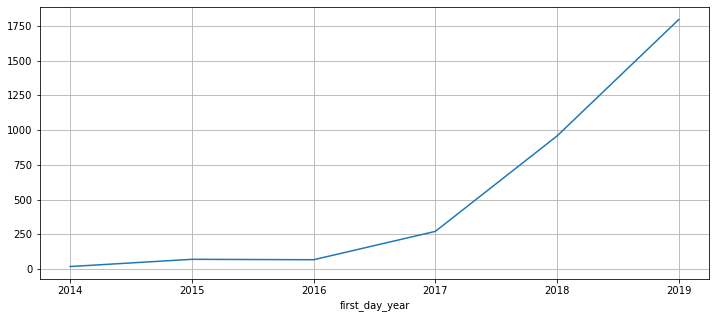

In [42]:
# Для наглядности построим график распределения пропусков в столбце 'days_exposition' за 2014-2019 годы.:

data.groupby('first_day_year')['days_exposition'].apply(lambda _data: _data.isna().sum()).plot(grid=True, figsize=(12, 5))
plt.show()

В столбце 'days_exposition' присутствуют значения от 1 до 1580 дней. Не будем ограничивать диапазон этих значений, т.к. квартиры могут продаваться в течение разного количества времени.
    
При этом из графика видно, что большая часть пропусков приходится на 2018-2019 годы. А значит удалять пропуски нельзя, т.к. при удалении данные из датафрейма получат сильное искажение по этим двум последним годам.

В итоге, в результате предобработки данных мы удалили только те строки, в которых не было указано название населённого пункта (столбец 'locality_name'), т.к. эти строки не имеют никакого прикладного значения.
        
В отношении других столбцов - ситуация сложнее. В data есть можество строк, в которых пропуски встречаются только в одной ячейке из всех остальных. Если мы последовательно начнём убирать такие строки, то в итоге удалим большую часть данных. Поэтому я решила не удалять строки с пропуски в остальных столбцах.
        
С выбросами - ситуация другая. Я приравняла значения выбросов к медианам по каждому значимому столбцу, предварительно сверив значения медиан и средних значений до и после фильтрации.

In [43]:
# Выведем общую информацию о датафрейме:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [44]:
# Заполним пропущенные значения в столбцах 'ceiling_height', 'living_area' и 'kitchen_area' на их медианы
# и выведем общую информацию о датафрейме повторно, чтобы убедиться, что замена произошла:

for column in ['ceiling_height', 'living_area', 'kitchen_area']:
    data[column] = data[column].fillna(data[column].median())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23565 non-null  Int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Посчитаем и добавим в таблицу новые столбцы

In [45]:
# Выведем предобработанные данные.

display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,first_day_year
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,2015
3,0,4650000.0,159.00,2015-07-24,3,2.65,14,30.0,9,NaN,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,2015
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,30.0,5,NaN,...,0,поселок городского типа Янино-1,NaN,NaN,0,NaN,0,NaN,55,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,30.0,6,NaN,...,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.0,22,NaN,...,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,30.0,26,NaN,...,0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289,2017


In [46]:
# Добавим в таблицу новые столбцы.

# Цена одного квадратного метра:
data['one_meter_price'] = data['last_price'] / data['total_area']

# День недели публикации объявления (0 — понедельник, 1 — вторник и так далее):
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

# Месяц публикации объявления:
data['month_exposition'] = data['first_day_exposition'].dt.month

# Год публикации объявления:
data['year_exposition'] = data['first_day_exposition'].dt.year

# Тип этажа квартиры (значения — «первый», «последний», «другой»):
def typefloor(data):
    try:
        if data['floor'] == 1:
            return 'первый'
        elif data['floor'] == data['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        'нет данных'
data['type_of_floor'] = data.apply(typefloor, axis=1)
    
# Расстояние до центра города в километрах (переведём из м в км и округлим до целых значений):
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

# Выведем обновлённый датафрейм.
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,first_day_year,one_meter_price,weekday_exposition,month_exposition,year_exposition,type_of_floor,cityCenters_nearest_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.0,8,NaN,...,2,755.0,<NA>,2019,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11,18.6,1,NaN,...,0,NaN,81,2018,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5,34.3,4,NaN,...,2,574.0,558,2015,92785.714286,3,8,2015,другой,14.0
3,0,4650000.0,159.00,2015-07-24,3,2.65,14,30.0,9,NaN,...,3,234.0,424,2015,29245.283019,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,NaN,...,1,48.0,121,2018,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12,30.0,5,NaN,...,0,NaN,55,2018,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26,30.0,6,NaN,...,0,NaN,155,2017,99195.710456,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24,30.0,22,NaN,...,0,NaN,<NA>,2019,110544.692737,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27,30.0,26,NaN,...,0,NaN,189,2018,87454.764777,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.6,7,NaN,...,0,NaN,289,2017,88524.590164,6,2,2017,другой,15.0


### Проведём исследовательский анализ данных

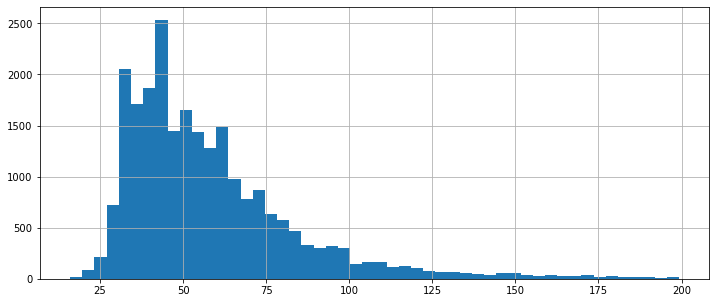

In [47]:
# 1. Изучим следующие параметры объектов:

# общая площадь:

data['total_area'].hist(figsize=(12, 5), bins=50)
plt.show()

In [48]:
display(data['total_area'].describe())

count    23650.000000
mean        58.085937
std         26.319032
min         16.000000
25%         40.000000
50%         52.000000
75%         68.300000
max        199.200000
Name: total_area, dtype: float64

Гисторамма частоты значений общей площади имеет вид распределения Пуассона.

Среднее значение общей площади 58,1 м² немного выше медианы 52,0 м², что говорит о наличии выбросов в верхних значениях. Эти выбросы происходят за счёт наличия в датафрейме данных об «элитных» квартирах (скорее всего в Санкт-Петербурге), которые завышают средние показатели площади. Межквартильный размах содержит основную часть данных общей площади. Т.е. в большинстве случаев общая площадь квартир составляет от 40,0 м² до 68,3 м².

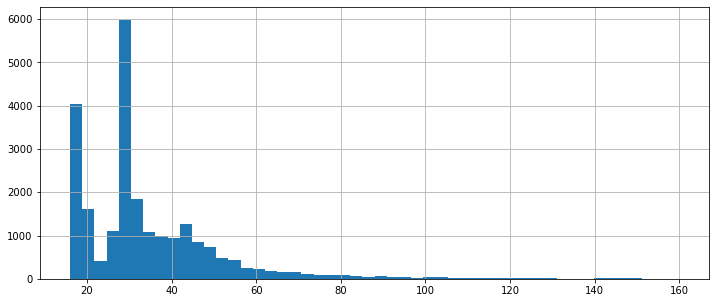

In [49]:
# жилая площадь:

data['living_area'].hist(figsize=(12, 5), bins=50)
plt.show()

In [50]:
display(data['living_area'].describe())

count    23650.000000
mean        34.386262
std         17.086988
min         16.000000
25%         23.200000
50%         30.000000
75%         41.000000
max        159.900000
Name: living_area, dtype: float64

Гисторамма частоты значений жилой площади имеет вид распределения Пуассона.

Среднее значение жилой площади 34,4 м² немного выше медианы 30,0 м², что говорит о наличии выбросов в верхних значениях (аналогично пункту выше). В большинстве случаев жилая площадь квартир составляет от 23,2 м² до 41,0 м².

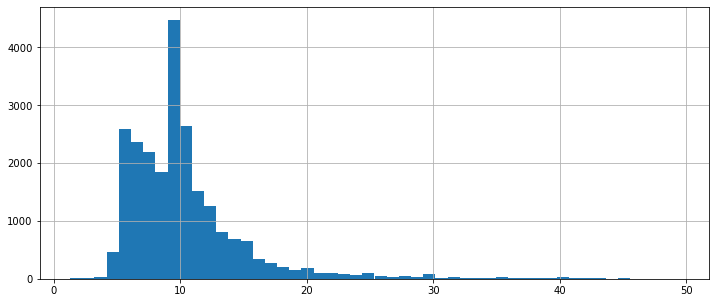

In [51]:
# площадь кухни:

data['kitchen_area'].hist(figsize=(12, 5), bins=50)
plt.show()

In [52]:
display(data['kitchen_area'].describe())

count    23650.000000
mean        10.293935
std          4.933306
min          1.300000
25%          7.300000
50%          9.100000
75%         11.400000
max         49.400000
Name: kitchen_area, dtype: float64

Гисторамма частоты значений площади кухни имеет вид распределения Пуассона.

Среднее значение площади кухни 10,3 м² немного выше медианы 9,1 м², что говорит о наличии выбросов в верхних значениях (аналогично пункту выше). В большинстве случаев площадь кухни составляет от 7,3 м² до 11,4 м².

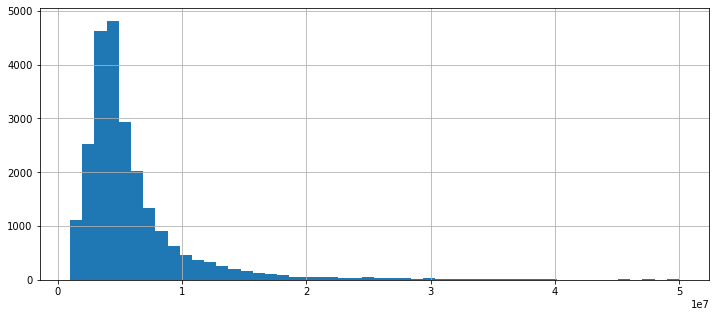

In [53]:
# цена объекта:

data['last_price'].hist(figsize=(12, 5), bins=50)
plt.show()

In [54]:
display(data['last_price'].describe())

count    2.365000e+04
mean     6.014000e+06
std      4.880972e+06
min      1.000000e+06
25%      3.490000e+06
50%      4.650000e+06
75%      6.700000e+06
max      4.996890e+07
Name: last_price, dtype: float64

Гисторамма частоты значений цена объекта имеет вид распределения Пуассона.

Среднее значение цены квартиры 6,01 млн руб. выше медианы 4,65 млн руб., что говорит о наличии выбросов в верхних значениях (аналогично пункту выше). В большинстве случаев цена квартиры составляет от 3,49 млн руб. до 6,70 млн руб.

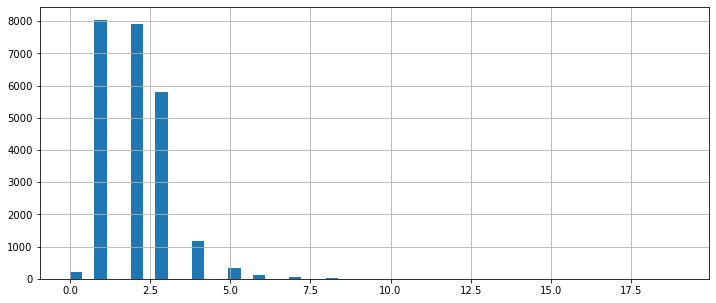

In [55]:
# количество комнат:

data['rooms'].hist(figsize=(12, 5), bins=50)
plt.show()

In [56]:
display(data['rooms'].describe())

count    23650.000000
mean         2.070106
std          1.078620
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Гисторамма частоты значений количества комнат имеет вид распределения Пуассона.

Среднее значение количества комнат совпадает с медианой и равно 2. В большинстве случаев количество комнат в квартире составляет от 1 до 3.

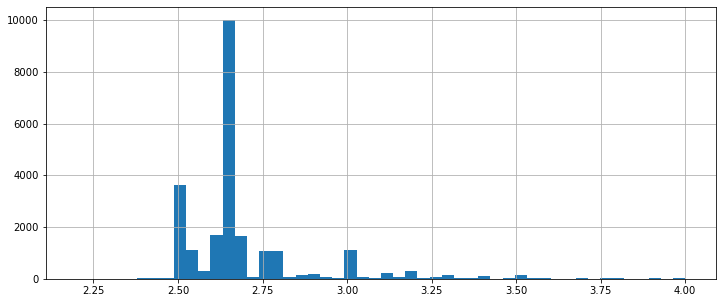

In [57]:
# высота потолков:

data['ceiling_height'].hist(figsize=(12, 5), bins=50)
plt.show()

In [58]:
display(data['ceiling_height'].describe())

count    23650.000000
mean         2.693404
std          0.203786
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

Гисторамма частоты значений высоты потолков имеет вид распределения Пуассона.

Среднее значение высоты потолков 2,69 м почти совпадает с медианой 2,65 м. В большинстве случаев высота потолков составляет от 2,60 м до 2,70 м.

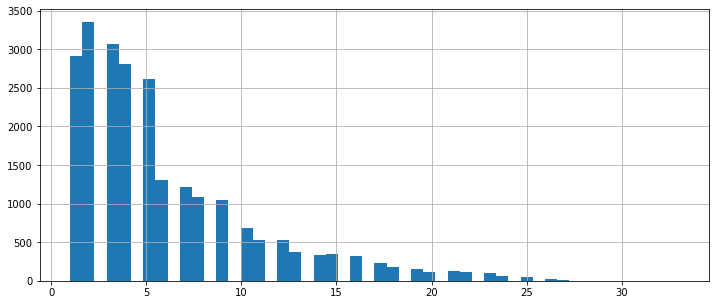

In [59]:
# этаж квартиры:

data['floor'].hist(figsize=(12, 5), bins=50)
plt.show()

In [60]:
display(data['floor'].describe())

count    23650.000000
mean         5.893277
std          4.883317
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Гисторамма частоты значений этажа квартиры имеет вид распределения Пуассона.

Среднее значение этажа квартиры 6 выше медианы 4. И это может означать то, что «элитные» квартиры расположены на более высоких этажах, относительно «стандартных» квартир. Либо то, что «элитные» квартиры расположены в более высоких домах. В большинстве случаев квартиры расположены от 2 до 8 этажей.

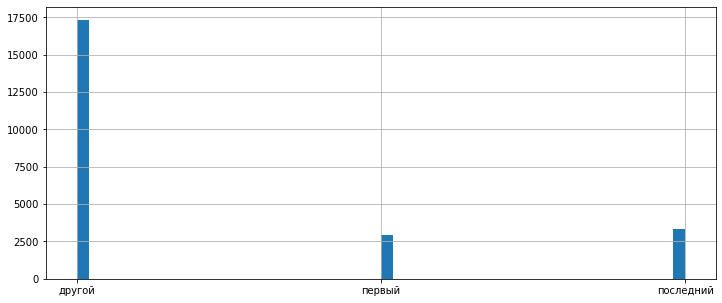

In [61]:
# тип этажа квартиры («первый», «последний», «другой»):

data['type_of_floor'].hist(figsize=(12, 5), bins=50)
plt.show()

In [62]:
display(data['type_of_floor'].describe())

count      23568
unique         3
top       другой
freq       17326
Name: type_of_floor, dtype: object

Квартиры, в основном, расположены не на первом и не на последнем этаже. Но на последнем этаже больше, чем на первом.



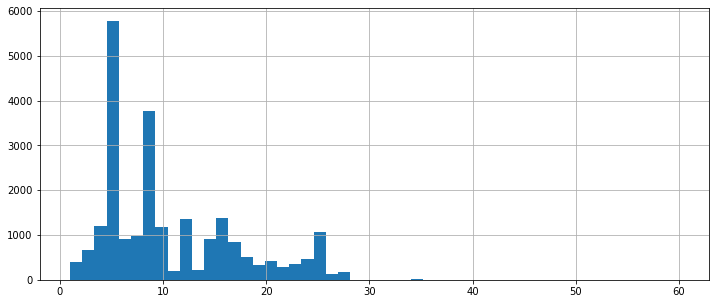

In [63]:
# общее количество этажей в доме:

data['floors_total'].hist(figsize=(12, 5), bins=50)
plt.show()

In [64]:
display(data['floors_total'].describe())

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Гисторамма частоты значений общего количества этажей в доме имеет вид распределения Пуассона.

Среднее значение общего количества этажей в доме 11 выше медианы 9. И это может доказывать то, что «элитные» квартиры расположены в более высоких домах, относительно «стандартных» квартир. В большинстве случаев общее количество этажей в доме - от 5 до 16.

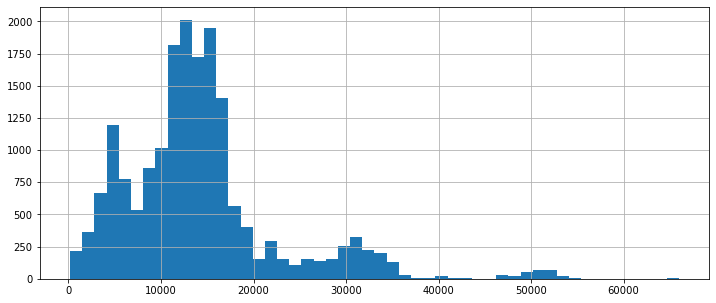

In [65]:
# расстояние до центра города в метрах:

data['cityCenters_nearest'].hist(figsize=(12, 5), bins=50)
plt.show()

In [66]:
display(data['cityCenters_nearest'].describe())

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Гисторамма частоты значений расстояния до центра города имеет вид распределения Пуассона.

Среднее значение расстояния до центра города 14198 м немного выше медианы 13105 м. Скорее всего, основной вклад в отличие среднего от медианы вносит Санкт-Петербург из-за относительно большей площади (а значит и множества вариантов разброса месторасположения квартир по городу) и подавляющего количества данных в датафрейме. В большинстве случаев расстояние до центра города составляет от 9241 м до 16293 м.

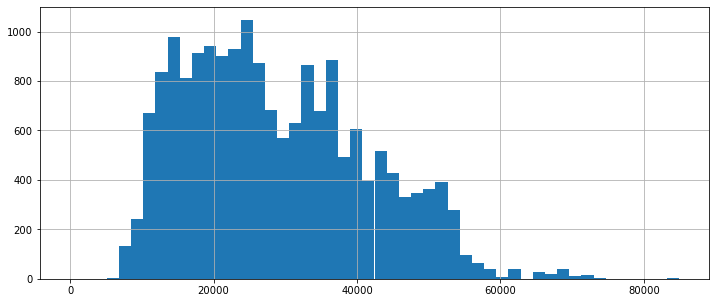

In [67]:
# расстояние до ближайшего аэропорта:

data['airports_nearest'].hist(figsize=(12, 5), bins=50)
plt.show()

In [68]:
display(data['airports_nearest'].describe())

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Гисторамма частоты значений расстояния до ближайшего аэропорта имеет вид распределения Пуассона.

Среднее значение расстояния до ближайшего аэропорта 28803 м немного выше медианы 26756 м. Здесь наоборот, основной вклад в отличие среднего от медианы вносят пригороды Санкт-Петербурга. Т.е. большинство квартир находятся в Санкт-Петербурге, и расстояние до аэропорта у них ближе, чем у квартир в пригородах. В большинстве случаев расстояние до ближайшего аэропорта составляет от 18575 м до 37294 м.

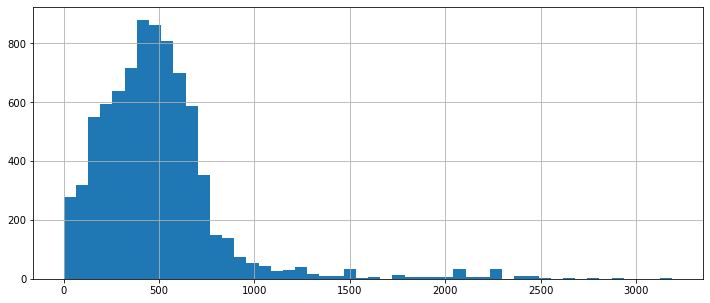

In [69]:
# расстояние до ближайшего парка:

data['parks_nearest'].hist(figsize=(12, 5), bins=50)
plt.show()

In [70]:
display(data['parks_nearest'].describe())

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Гисторамма частоты значений расстояния до ближайшего парка имеет вид распределения Пуассона.

Среднее значение расстояния до ближайшего парка 491 м немного выше медианы 455 м. Здесь какого-то явного различия нет. В большинстве случаев расстояние до ближайшего парка составляет от 288 м до 612 м.

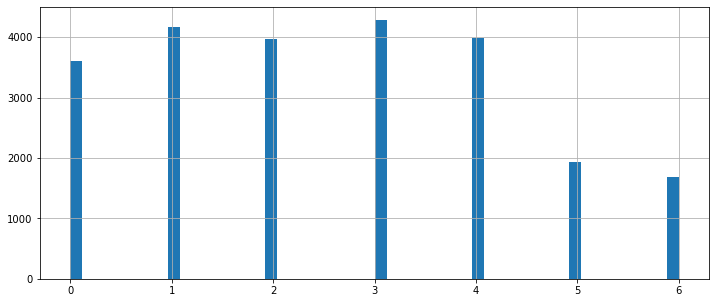

In [71]:
# день публикации объявления:

data['weekday_exposition'].hist(figsize=(12, 5), bins=50)
plt.show()

In [72]:
display(data['weekday_exposition'].describe())

count    23650.000000
mean         2.568710
std          1.788808
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday_exposition, dtype: float64

В большинстве случаев объявления публиковались по будням, лидируют – вторник и четверг.

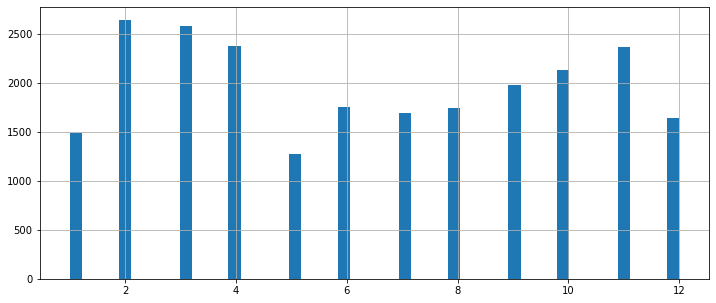

In [73]:
# месяц публикации объявления:

data['month_exposition'].hist(figsize=(12, 5), bins=50)
plt.show()

In [74]:
display(data['month_exposition'].describe())

count    23650.000000
mean         6.401564
std          3.491418
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_exposition, dtype: float64

Из месяцев лидируют конец зимы - начало весны (февраль, март, апрель) и ноябрь. Провалы наблюдаются в январе, мае, декабре (видимо, связано с праздниками). Летом объявления также публиковались не много.

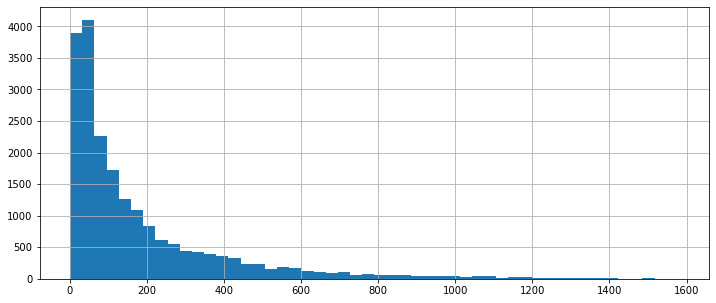

In [75]:
# 2. Изучим, как быстро продавались квартиры (столбец 'days_exposition'). 
# Этот параметр показывает, сколько дней было размещено каждое объявление.

# Построим гистограмму:

data['days_exposition'].hist(figsize=(12, 5), bins=50)
plt.show()

In [76]:
# Посчитаем среднее и медиану.

display(data['days_exposition'].describe())

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Гисторамма частоты значений количества дней, в течение которых было размещено объявление (т.е. длительности продаж), имеет вид распределения Пуассона.
        
Среднее значение количества дней, в течение которых было размещено объявление, 180 дней почти в 2 раза больше медианы 95 дней. Это говорит о том, что в датафрейме есть объявления, которые были размещены очень большое количество дней. В большинстве случаев объявление было размещено от 45 до 231 дня. Это и есть время продажи. Быстрые продажи - от 1 до 45 дней, долгие - от 231 до 1580 дней.

In [77]:
# Напишем функцию, которая распределяет долгие продажи в столбце 'days_exposition' на категории:
# от 231 дней до 2-х лет (730 дней) - долгие продажи;
# от 2-х лет (731 день) до 3-х лет (1095 дней) - очень долгие продажи;
# от 3-х лет (1096 дней) до 1580 дней - ультрадолгие продажи.

def categorize_days_exposition_long(days):
    try:
        if 231.0 <= days <= 730.0:
            return 'долгая продажа'
        elif 731.0 <= days <= 1095.0:
            return 'очень долгая продажа'
        elif 1096.0 <= days <= 1580.0:
            return 'ультрадолгая продажа'
    except:
        pass

In [78]:
# Создадим столбец с этими категориями и выведем количество значений по каждой их них:

data['days_exposition_long_category'] = data['days_exposition'].apply(categorize_days_exposition_long)
data['days_exposition_long_category'].value_counts()

долгая продажа          4386
очень долгая продажа     583
ультрадолгая продажа     166
Name: days_exposition_long_category, dtype: int64

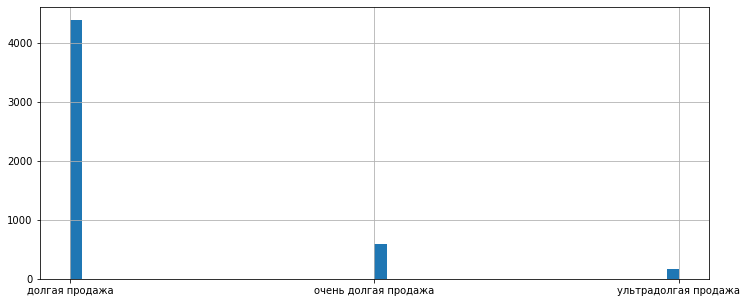

In [79]:
data['days_exposition_long_category'].hist(figsize=(12, 5), bins=50)
plt.show()

Гисторамма частоты значений долгих продаж в столбце 'days_exposition_long_category', в целом, имеет вид распределения Пуассона. Что ожидаемо: чем длительнее срок - тем ниже количество значений.

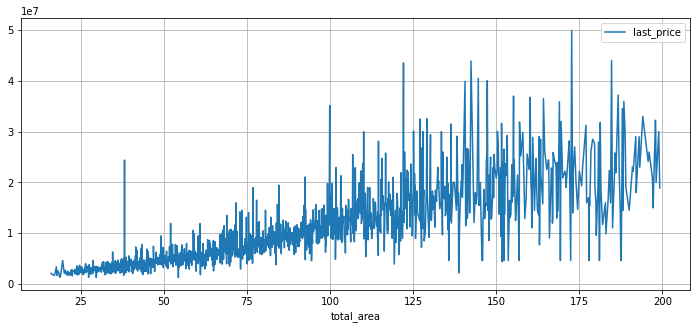

In [80]:
# 3. Посмотрим, какие факторы больше всего влияют на общую (полную) стоимость объекта.
# Изучим, зависит ли цена от следующих параметров:

# общая площадь:

data.pivot_table(index='total_area', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

In [81]:
# Для того, чтобы определить наличие линейной связи между величинами общей площади и общей (полной) стоимости объекта,
# найдём коэффициент корреляции Пирсона:

print(data['total_area'].corr(data['last_price']))

0.6900310853322784


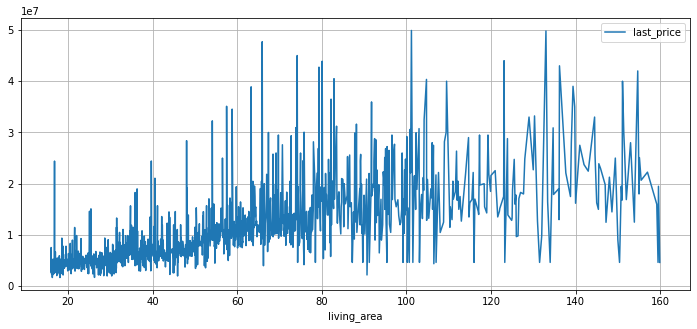

In [82]:
# жилая площадь:

data.pivot_table(index='living_area', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

In [83]:
# Для того, чтобы определить наличие линейной связи между величинами жилой площади и общей (полной) стоимости объекта,
# найдём коэффициент корреляции Пирсона:

print(data['living_area'].corr(data['last_price']))

0.5852274793955853


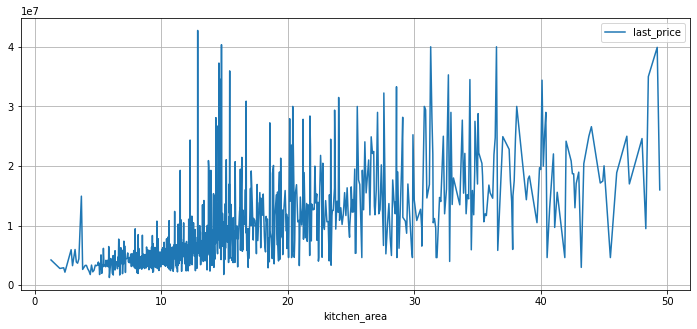

In [84]:
# площадь кухни:

data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

In [85]:
# Для того, чтобы определить наличие линейной связи между величинами площадь кухни и общей (полной) стоимости объекта,
# найдём коэффициент корреляции Пирсона:

print(data['kitchen_area'].corr(data['last_price']))

0.5364323035397837


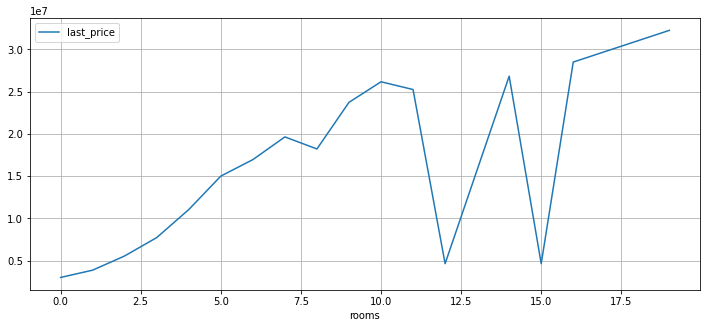

In [86]:
# количество комнат:

data.pivot_table(index='rooms', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

In [87]:
# Для того, чтобы определить наличие линейной связи между величинами количества комнат и общей (полной) стоимости объекта,
# найдём коэффициент корреляции Пирсона:

print(data['rooms'].corr(data['last_price']))

0.4937842306836586


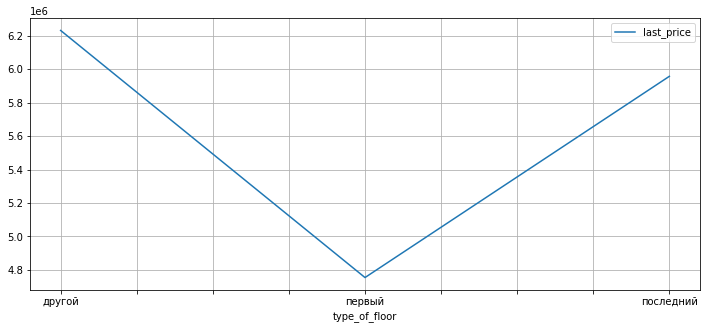

In [88]:
# этаж, на котором расположена квартира (первый, последний, другой):

data.pivot_table(index='type_of_floor', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

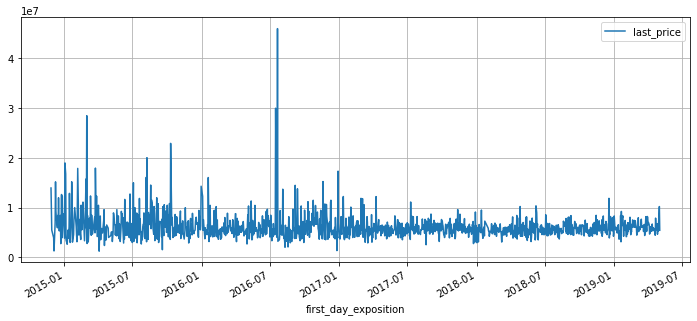

In [89]:
# дата размещения (день недели, месяц, год):

data.pivot_table(index='first_day_exposition', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

О наличии линейной зависимости между величинами говорит коэффициент корреляции Пирсона.
Коэффициент корреляции Пирсона для зависимоти между общей (полной) стоимостью объекта и:
- общей площадью составляет 0,69;
- жилой площадью - 0,59;
- площадью кухни - 0,54;
- количеством комнат - 0,49.
        
Т.е. видно, что зависимость существует. Больше всего от общей площади, меньше - от количества комнат.      
        
Типы данных для этажа, на котором расположена квартира и даты размещения не являются числовыми, поэтому коэффициент корреляции Пирсона к ним применить нельзя.
Тем не менее, из графика видно, что стоимость квартир на первом этаже (около 4,8 млн руб.) - ниже стоимости квартир на других этажах (около 6,0 млн руб.). Разница в стоимости квартир между последним и другими этажами - несущественная.

Зависимости роста общей стоимости объектов от даты размещения, в целом, за несколько лет не наблюдается.

In [90]:
# 4. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
# Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
# Эти данные можно найти по имени в столбце 'locality_name'.

# Выведем список 10 населённых пунктах с наибольшим числом объявлений:

data.value_counts('locality_name').head(10)

locality_name
Санкт-Петербург      15721
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 369
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
dtype: int64

In [91]:
# Теперь посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
        
top_one_meter_price_mean = data.pivot_table(index='locality_name', values='one_meter_price', aggfunc=['count', 'mean'])
top_one_meter_price_mean = top_one_meter_price_mean.sort_values(by=('count', 'one_meter_price'), ascending=False)
display(top_one_meter_price_mean.head(10))

,count,mean
,one_meter_price,one_meter_price
locality_name,,
Санкт-Петербург,15721,115266.258375
поселок Мурино,556,85681.762601
поселок Шушары,440,78677.364217
Всеволожск,398,69065.888838
Пушкин,369,109397.577401
Колпино,338,77209.870028
поселок Парголово,327,90520.614136
Гатчина,307,68904.837150


Населённый пункт с самой высокой стоимостью квадратного метра - Санкт-Петербург.

Населённый пункт с самой низкой стоимостью квадратного метра - Выборг.

In [92]:
# 5. Ранее мы посчитали расстояние до центра в километрах (столбец 'cityCenters_nearest_km').
# Теперь выделим квартиры в Санкт-Петербурге с помощью столбца 'locality_name' и вычислим среднюю цену каждого километра. 
# Опишем, как стоимость объектов зависит от расстояния до центра города.

# Вычислим среднюю цену каждого километра до центра для data и сохраним результаты в дополнительный столбец 'price_per_km':

data['price_per_km'] = data['last_price'] / data['cityCenters_nearest_km']

# В столбце 'cityCenters_nearest_km' встречаются значения, равные 0. 
# Чтобы воспользоваться формулой выше, необходимо избавиться от этих нулей.
# Посмотрим их количество и к каким населённым пунктам они относятся:

display(
    data.loc[data['cityCenters_nearest_km'] == 0, 
    ['locality_name', 'cityCenters_nearest_km']]
    .value_counts('locality_name')
)

locality_name
Санкт-Петербург    27
dtype: int64

In [93]:
# Итак, в столбце 'cityCenters_nearest_km' 27 строк с нулями. 
# И все они относятся к населённому пункту 'Санкт-Петербург'.
# Т.к. в data подавляющее большинство данных собрано имеено по Санкт-Петербургу, эти строки можно удалить.

# Чтобы убедиться в том, что строки с нулями были удалены, выведем их количество до и после удаления.

# До удаления:
data['cityCenters_nearest_km'].count()

18139

In [94]:
# После удаления:

data = data.query('cityCenters_nearest_km != 0')
data['cityCenters_nearest_km'].count()

18112

In [95]:
# Теперь вычислим среднюю цену каждого километра до центра для квартир в Санкт-Петербурге:

data_price_per_km_spb = data.pivot_table(index='locality_name', values='price_per_km')
data_price_per_km_spb = data_price_per_km_spb.query('locality_name in "Санкт-Петербург"')

display(data_price_per_km_spb)

,price_per_km
locality_name,
Санкт-Петербург,1.092459e+06


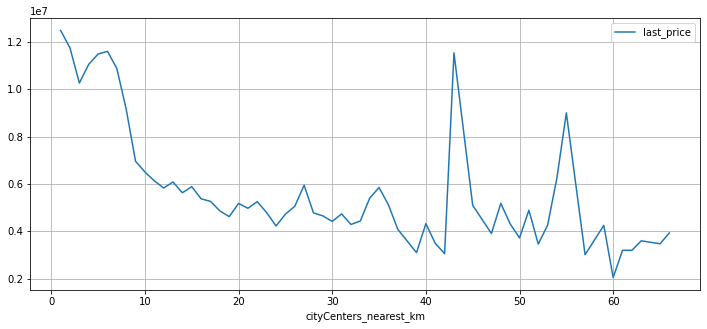

In [96]:
# Итак, средняя цена за один километр до центра в Санкт-Петербурге около 1100000 руб.
# Опишем, как стоимость объектов зависит от расстояния до центра города:

data.pivot_table(index='cityCenters_nearest_km', values='last_price').plot(grid=True, figsize=(12, 5))
plt.show()

Cтоимость объектов падает в зависити от расстояния до центра Санкт-Петербурга. Тем не менее, в области 43 и 55 км наблюдаются пики в стоимости. Возможно, это связано с расположенном на этом расстоянии загородном "элитном" жилье близ Санкт-Петербурга.

### Общий вывод

Общий вывод

    
Проведено исследование с целью выявить интересные особенности и зависимости, которые существуют на рынке недвижимости.
        
Входные данные – архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах от сервиса Яндекс Недвижимость. О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.
        
Результаты исследования будут учтены при построении модели зависимости стоимости объектов от различных параметров на рынке недвижимости.           
    
        
Перед проведением исследования были сформулированы несколько гипотез:

- Гипотеза 1: общая площадь влияет на общую (полную) стоимость объекта;
- Гипотеза 2: жилая площадь влияет на общую (полную) стоимость объекта;
- Гипотеза 3: площадь кухни влияет на общую (полную) стоимость объекта;
- Гипотеза 4: количество комнат влияет на общую (полную) стоимость объекта;
- Гипотеза 5: этаж, на котором расположена квартира, влияет на общую (полную) стоимость объекта;
- Гипотеза 6: дата размещения объявления влияет на общую (полную) стоимость объекта; 
- Гипотеза 7: расстояния до центра Санкт-Петербурга влияет на общую (полную) стоимость объекта.   

В результате удалось выявить следующие зависимости.

<b>Гипотеза 1 подтверждена:</b>

- 0,69 - коэффициент корреляции Пирсона для зависимости между общей (полной) стоимостью объекта и общей площадью, что говорит о росте общей стоимости объекта с увеличением общей площади.

Рекомендация: несмотря на то, что зависимость линейная, она не прямая, что свидетельствует о влиянии других параметров на рост общей стоимости объектов.

<b>Гипотеза 2 подтверждена:</b>

- 0,59 - коэффициент корреляции Пирсона для зависимости между общей (полной) стоимостью объекта и жилой площадью, что говорит о росте общей стоимости объекта с увеличением жилой площади.

Рекомендация: несмотря на то, что зависимость линейная, она не прямая, что свидетельствует о влиянии других параметров на рост общей стоимости объектов.

<b>Гипотеза 3 подтверждена:</b>

- 0,54 - коэффициент корреляции Пирсона для зависимости между общей (полной) стоимостью объекта и площадью кухни, что говорит о росте общей стоимости объекта с увеличением площади кухни.

Рекомендация: несмотря на то, что зависимость линейная, она не прямая, что свидетельствует о влиянии других параметров на рост общей стоимости объектов.

<b>Гипотеза 4 частично подтверждена:</b>

- 0,49 - коэффициент корреляции Пирсона для зависимости между общей (полной) стоимостью объекта и количеством комнат, что говорит о росте общей стоимости объекта с увеличением количества комнат.
        
Рекомендация: присутствует скорее слабая линейная зависимость, что свидетельствует о существенном влиянии других параметров (возможно качественных) на рост общей стоимости объектов.
        
<b>Гипотеза 5 частично подтверждена:</b>

- стоимость квартир на первом этаже (около 4,8 млн руб.) существенно ниже стоимости квартир на последнем и других этажах (около 6,0 млн руб.).
        
Рекомендация: разница в стоимости квартир между последним и другими этажами - несущественная, что свидетельствует о влиянии других параметров на рост общей стоимости объектов.
 
<b>Гипотеза 6 не подтверждена:</b>

- зависимости роста общей стоимости объектов от даты размещения, в целом, за несколько лет не наблюдается.
        
Рекомендация: несмотря на то, что зависимость в течение длительного периода не прослеживается, существует возможность выявить такие зависимости за более короткий промежуток времени, включив в выборку дополнительные (возможно качественные) параметры.
        
<b>Гипотеза 7 частично подтверждена:</b>

- стоимость объектов падает в зависити от расстояния до центра Санкт-Петербурга. Тем не менее, в области 43 и 55 км наблюдаются пики в стоимости. 
        
Рекомендация: на расстоянии о центра Санкт-Петербурга свыше 43 км, возможно, расположено загородное "элитное" жилье, что свидетельствует о существенном влиянии других параметров на рост общей стоимости объектов.    
        
<b>Общие рекомендации:</b>

1.	Специалистам, которые занимаются построением модели зависимости стоимости объектов от различных параметров на рынке недвижимости, можно использовать зависимости из гипотез 1, 2 и 3 (общая, жилая площадь и площадь кухни).
2.	Необходимо собрать более полную выборку с дополнпительными параметрами (возможно качественными) для повторной проверки гипотез 4, 5, 6 и 7 (количество комнат, этаж, дата размещения объявления и расстояние до центра города).